## "Predicting House Prices in Indian Metropolitan Cities: A Comprehensive Analysis and Price Forecasting Model"

## "House Price Prediction Model for Chennai, India"

#### Components of the House Price Prediction Model:

1. Importing Dependencies
2. Data Importing 
3. Preprocessing 
4. Visualization 
5. Standardizing the Data
6. Label Encoding
7. Model Training
8. Model Deployment

#### 1. Importing dependencies.

We imported NumPy and Pandas for data handling, Matplotlib and Seaborn for visualization, and essential machine learning tools such as RandomForestRegressor and XGBRegressor for predictive modeling. Additionally, we included preprocessing tools like StandardScaler and LabelEncoder for data preprocessing and evaluation metrics like r2_score for assessing model performance and pickle for deployment purpose.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

#### 2. Importing Chennai House Price Dataset.

In [4]:
data = pd.read_csv('C:/Users/aksha/OneDrive/Documents/SRM_Internship_project/Indian_cities/Chennai.csv')

#### 3. Preprocessing

3.1 We quickly review a subset of the dataset using data.sample() to gain insights into its contents.

In [5]:
data.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
446,4230000,1055,Avadi,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
450,2450000,570,Avadi,1,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1494,34000000,2380,Adyar,4,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
428,3700000,892,Avadi,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,10700000,1909,Korattur,4,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0


##### Overview of Each Column:

1. **Price**: Target variable representing the price of the property.
2. **Area**: Non-categorical column indicating the area (size) of the property.
3. **Location**: Non-categorical column indicating the location of the property.
4. **No. of Bedrooms**: Number of bedrooms in the property.
5. **Resale**: Binary indicator (0 or 1) representing whether the property is a resale.
6. **MaintenanceStaff**: Binary indicator representing the availability of maintenance staff.
7. **Gymnasium**: Binary indicator representing the availability of a gymnasium.
8. **SwimmingPool**: Binary indicator representing the availability of a swimming pool.
9. **LandscapedGardens**: Binary indicator representing the availability of landscaped gardens.
10. **JoggingTrack**: Binary indicator representing the availability of a jogging track.
11. **RainWaterHarvesting**: Binary indicator representing the availability of rainwater harvesting.
12. **IndoorGames**: Binary indicator representing the availability of indoor games facilities.
13. **ShoppingMall**: Binary indicator representing the proximity to a shopping mall.
14. **Intercom**: Binary indicator representing the availability of an intercom system.
15. **SportsFacility**: Binary indicator representing the availability of sports facilities.
16. **ATM**: Binary indicator representing the proximity to an ATM.
17. **ClubHouse**: Binary indicator representing the availability of a clubhouse.
18. **School**: Binary indicator representing the proximity to a school.
19. **24X7Security**: Binary indicator representing the availability of 24x7 security.
20. **PowerBackup**: Binary indicator representing the availability of power backup.
21. **CarParking**: Binary indicator representing the availability of car parking.
22. **StaffQuarter**: Binary indicator representing the availability of staff quarters.
23. **Cafeteria**: Binary indicator representing the availability of a cafeteria.
24. **MultipurposeRoom**: Binary indicator representing the availability of a multipurpose room.
25. **Hospital**: Binary indicator representing the proximity to a hospital.
26. **WashingMachine**: Binary indicator representing the availability of a washing machine.
27. **Gasconnection**: Binary indicator representing the availability of a gas connection.
28. **AC**: Binary indicator representing the availability of air conditioning.
29. **Wifi**: Binary indicator representing the availability of Wi-Fi.
30. **Children'splayarea**: Binary indicator representing the availability of a children's play area.
31. **LiftAvailable**: Binary indicator representing the availability of a lift.
32. **BED**: Binary indicator representing the availability of a bed.
33. **VaastuCompliant**: Binary indicator representing whether the property is Vaastu compliant.
34. **Microwave**: Binary indicator representing the availability of a microwave.
35. **GolfCourse**: Binary indicator representing the proximity to a golf course.
36. **TV**: Binary indicator representing the availability of a television.
37. **DiningTable**: Binary indicator representing the availability of a dining table.
38. **Sofa**: Binary indicator representing the availability of a sofa.
39. **Wardrobe**: Binary indicator representing the availability of a wardrobe.
40. **Refrigerator**: Binary indicator representing the availability of a refrigerator.

In this dataset, 'Price' is the target variable we aim to predict, while 'Area' and 'Location' are the non-categorical columns. All other columns represent categorical variables indicating various features or amenities of the properties.


3.2 We're counting how many rows and columns there are in the dataset.

In [6]:
data.shape

(2233, 40)

- No of rows in dataset = 2233
- No of columns in dataset = 40

3.3 Stroing name of columns in columns variable.
This code iterates through each column in the dataset, excluding 'Price', 'Area', and 'Location'. For each column, it prints the count of unique values and a separator.This code checks if any columns contain only zeros as categorical values and drops them if found.

In [7]:
columns = data.columns

In [8]:
for column in columns:
    if column == 'Price':
        continue
    elif column == 'Area':
       continue
    elif column == 'Location':
       continue
    else:
     print(data[column].value_counts(),'\n========================\n')

No. of Bedrooms
2    1245
3     714
1     185
4      84
5       5
Name: count, dtype: int64 

Resale
0    1998
1     235
Name: count, dtype: int64 

MaintenanceStaff
0    2187
1      46
Name: count, dtype: int64 

Gymnasium
0    1121
1    1112
Name: count, dtype: int64 

SwimmingPool
0    1385
1     848
Name: count, dtype: int64 

LandscapedGardens
0    1616
1     617
Name: count, dtype: int64 

JoggingTrack
0    1575
1     658
Name: count, dtype: int64 

RainWaterHarvesting
0    1614
1     619
Name: count, dtype: int64 

IndoorGames
0    1588
1     645
Name: count, dtype: int64 

ShoppingMall
0    2149
1      84
Name: count, dtype: int64 

Intercom
0    1594
1     639
Name: count, dtype: int64 

SportsFacility
0    1788
1     445
Name: count, dtype: int64 

ATM
0    2051
1     182
Name: count, dtype: int64 

ClubHouse
0    1415
1     818
Name: count, dtype: int64 

School
0    2105
1     128
Name: count, dtype: int64 

24X7Security
0    1581
1     652
Name: count, dtype: int64 

Power

#### Insights
We can see that in entire dataset there is no house where facility like wifi, golfcourse and wardrobe is there, thus this features will not have any impact on determining the price of house. Thus we will drop this columns.

In [9]:
# wifi,golfcourse,wardrobe are the col
data = data.drop(columns=['Wifi','GolfCourse','Wardrobe'],axis=1)

In [10]:
#now number of columns decreased.
data.shape

(2233, 37)

3.4 Now we will take a look on statistical data

In [11]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,AC,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,TV,DiningTable,Sofa,Refrigerator
count,2.233000e+03,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,...,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,8.301333e+06,1188.879534,2.318854,0.105240,0.020600,0.497985,0.379758,0.276310,0.294671,0.277206,...,0.010300,0.472906,0.611733,0.017017,0.171070,0.012091,0.038961,0.044783,0.014778,0.038961
std,1.033733e+07,596.537185,0.686850,0.306931,0.142073,0.500108,0.485435,0.447272,0.455997,0.447719,...,0.100988,0.499377,0.487465,0.129365,0.376655,0.109318,0.193545,0.206873,0.120692,0.193545
min,2.000000e+06,379.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+06,862.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.700000e+06,1038.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.250000e+06,1369.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.900000e+08,7240.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2233 non-null   int64 
 1   Area                 2233 non-null   int64 
 2   Location             2233 non-null   object
 3   No. of Bedrooms      2233 non-null   int64 
 4   Resale               2233 non-null   int64 
 5   MaintenanceStaff     2233 non-null   int64 
 6   Gymnasium            2233 non-null   int64 
 7   SwimmingPool         2233 non-null   int64 
 8   LandscapedGardens    2233 non-null   int64 
 9   JoggingTrack         2233 non-null   int64 
 10  RainWaterHarvesting  2233 non-null   int64 
 11  IndoorGames          2233 non-null   int64 
 12  ShoppingMall         2233 non-null   int64 
 13  Intercom             2233 non-null   int64 
 14  SportsFacility       2233 non-null   int64 
 15  ATM                  2233 non-null   int64 
 16  ClubHo

key observations:

1. The 'Location' column is the only one with a data type of 'object', while all other columns are of type 'int'.
2. The lowest price recorded in the dataset is 2 million INR.
3. The highest price recorded in the dataset is 190 million INR.
4. The smallest area of a house in the dataset is 379 square units.
5. The largest area of a house in the dataset is 7240 square units.

3.5 Checking Is there any null values.

In [13]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
TV                     0
DiningTable            0
Sofa                   0
Refrigerator           0
dtype: int64

3.6 "Counting Houses by Location"

In [14]:
pd.set_option('display.max_rows', None)
data.Location.value_counts()

Location
Medavakkam                      120
Nanmangalam                     104
Karapakkam                      100
Avadi                            93
Sholinganallur                   84
Iyappanthangal                   63
Thoraipakkam OMR                 60
Selaiyur                         55
Navallur                         52
Mogappair                        50
Kolapakkam                       48
Ambattur                         47
Anna Nagar                       46
Korattur                         39
Madipakkam                       38
tambaram west                    37
Mugalivakkam                     37
Perungalathur                    36
Pammal                           33
Pallikaranai                     33
Thiruverkadu                     32
Kovilambakkam                    30
Kolathur                         30
Poonamallee                      29
Madambakkam                      29
Perumbakkam                      28
Manapakkam                       27
Maduravoyal        

3.7 Identifying Outliers: Locations with Few Houses
Many locations have only a few houses, which may act as outliers in the data and potentially impact our model's performance. To address this, we will group locations with fewer than 11 houses together and categorize them under a separate variable.

In [15]:
location_count = data['Location'].value_counts()
location_count_less_10 = location_count[location_count<=10]

In [16]:
data['Location'] = data['Location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
len(data['Location'].value_counts())

57

#### 4. Visualization

4.1 This code generates a heatmap to visualize the correlation between different features in the dataset, excluding the 'Location' column. Each cell in the heatmap represents the correlation coefficient between two features, with annotations provided to indicate the strength of correlation.

In [17]:
corr_data = data.drop(columns='Location')
corr = corr_data.corr()

<Axes: >

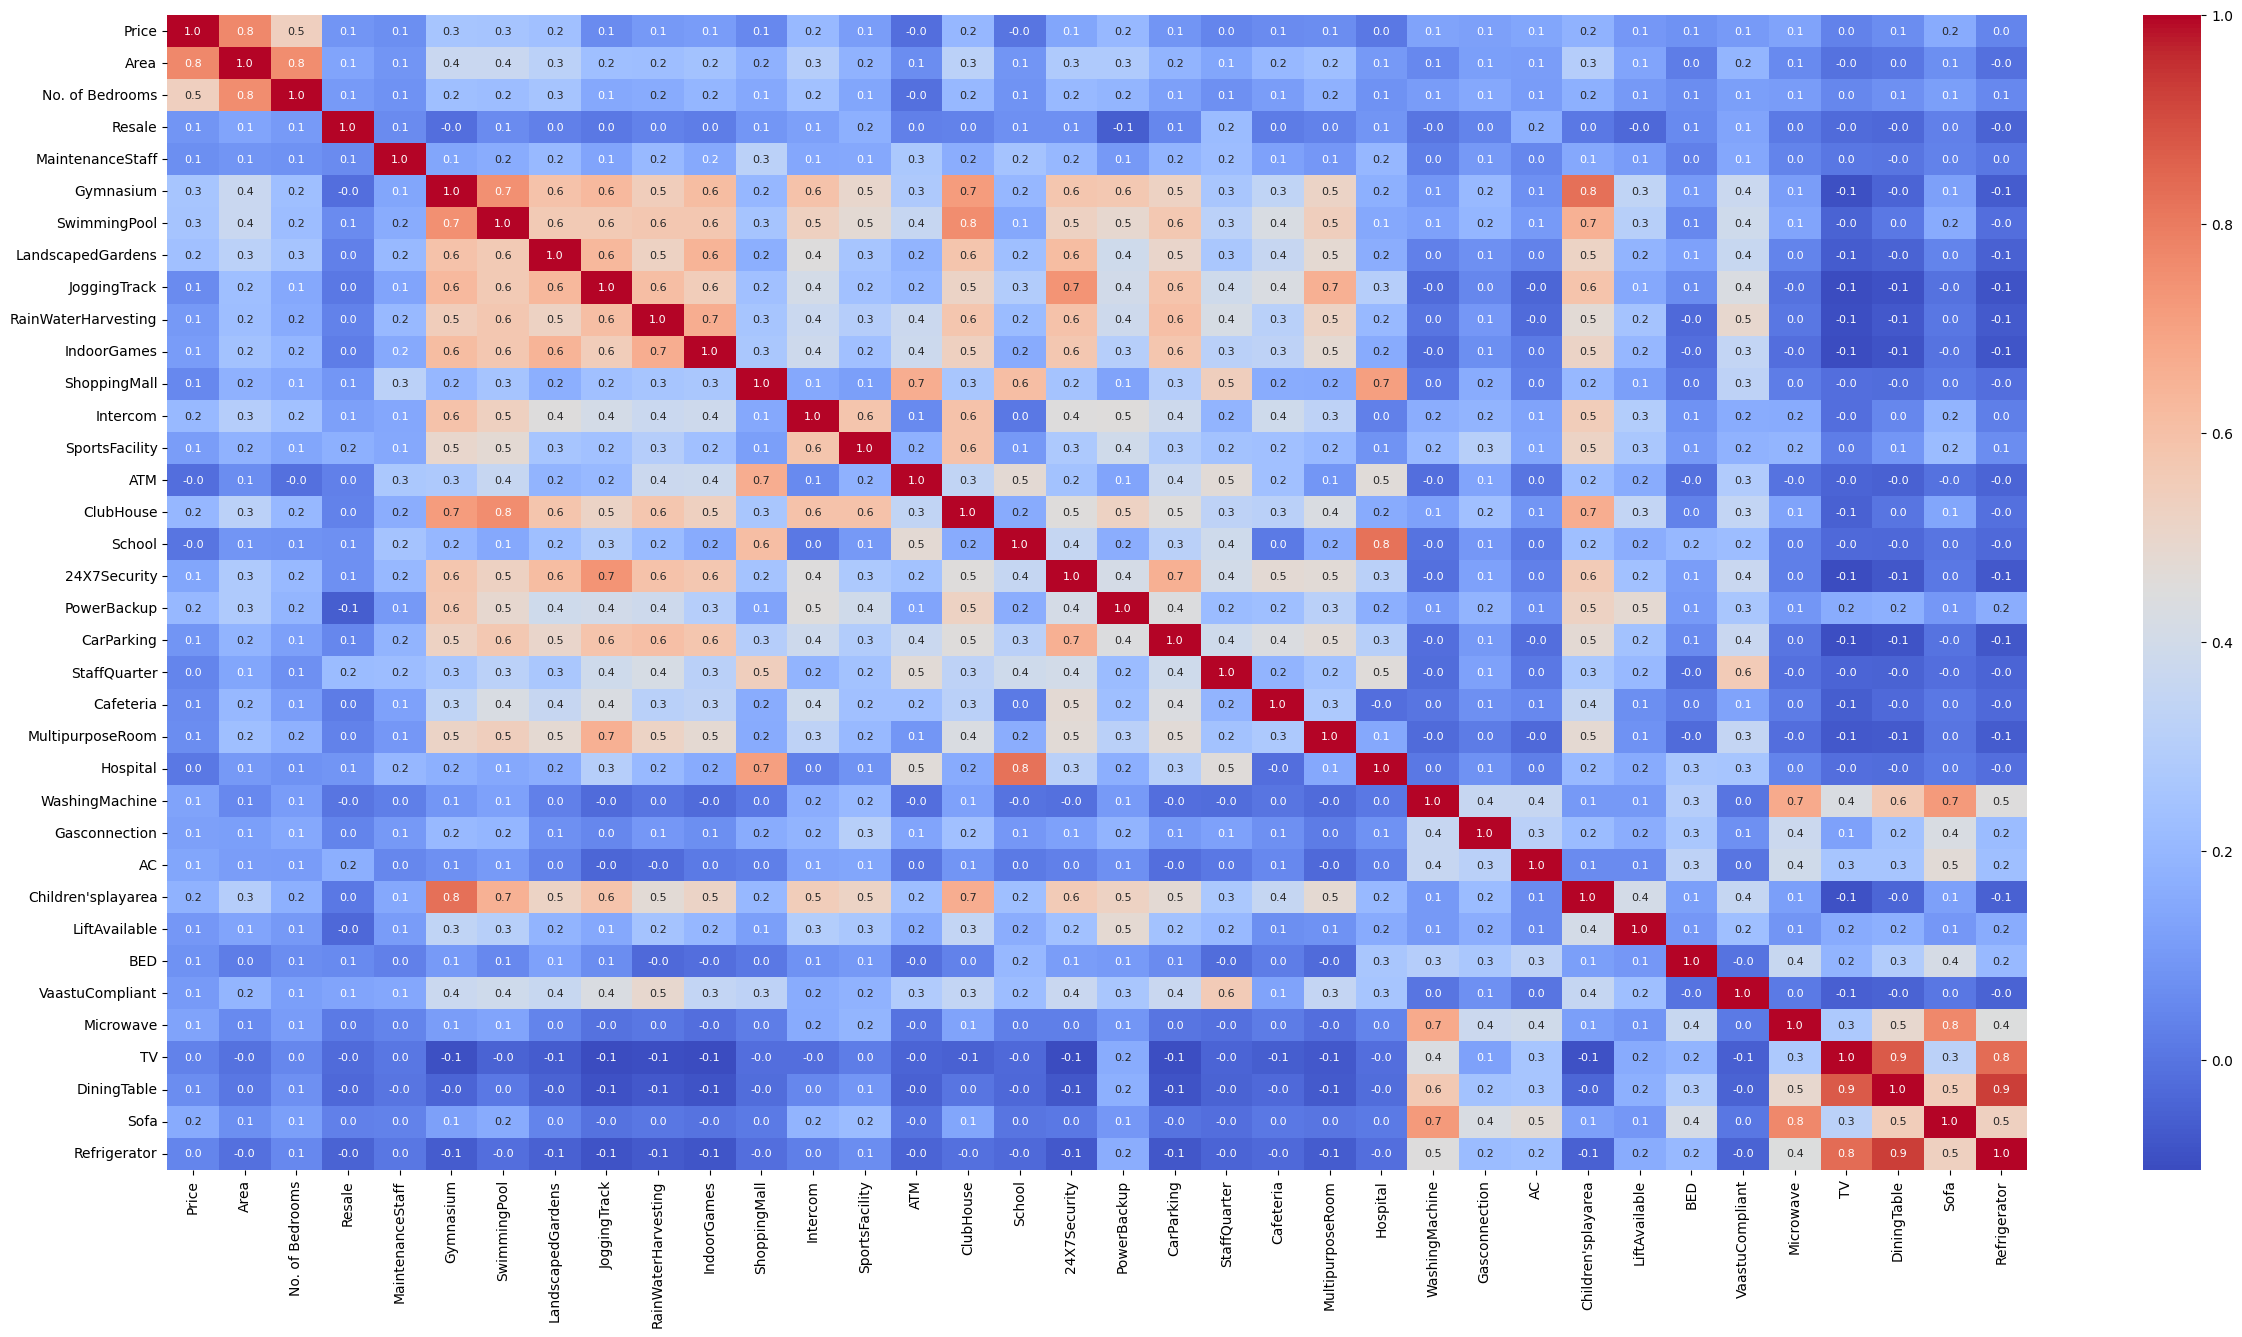

In [18]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='coolwarm')

#### Insights from the Heat Map:

1. Dark brown color indicates strong positive correlation, while lighter brown or blue colors signify weaker positive correlation. Dark blue represents strong negative correlation.

2. For example:
   - It's unsurprising to find a robust positive correlation between 'SwimmingPool' and 'ChildrenPlayingArea', and 'ChildrenPlayingArea' and 'ClubHouse', given their common co-occurrence in residential settings.
   - Like this We can see positive or negative correlation between various features.

4.2 Taking insights from bar plot of all categorical columns

In [19]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Children'splayarea', 'LiftAvailable', 'BED',
       'VaastuCompliant', 'Microwave', 'TV', 'DiningTable', 'Sofa',
       'Refrigerator'],
      dtype='object')

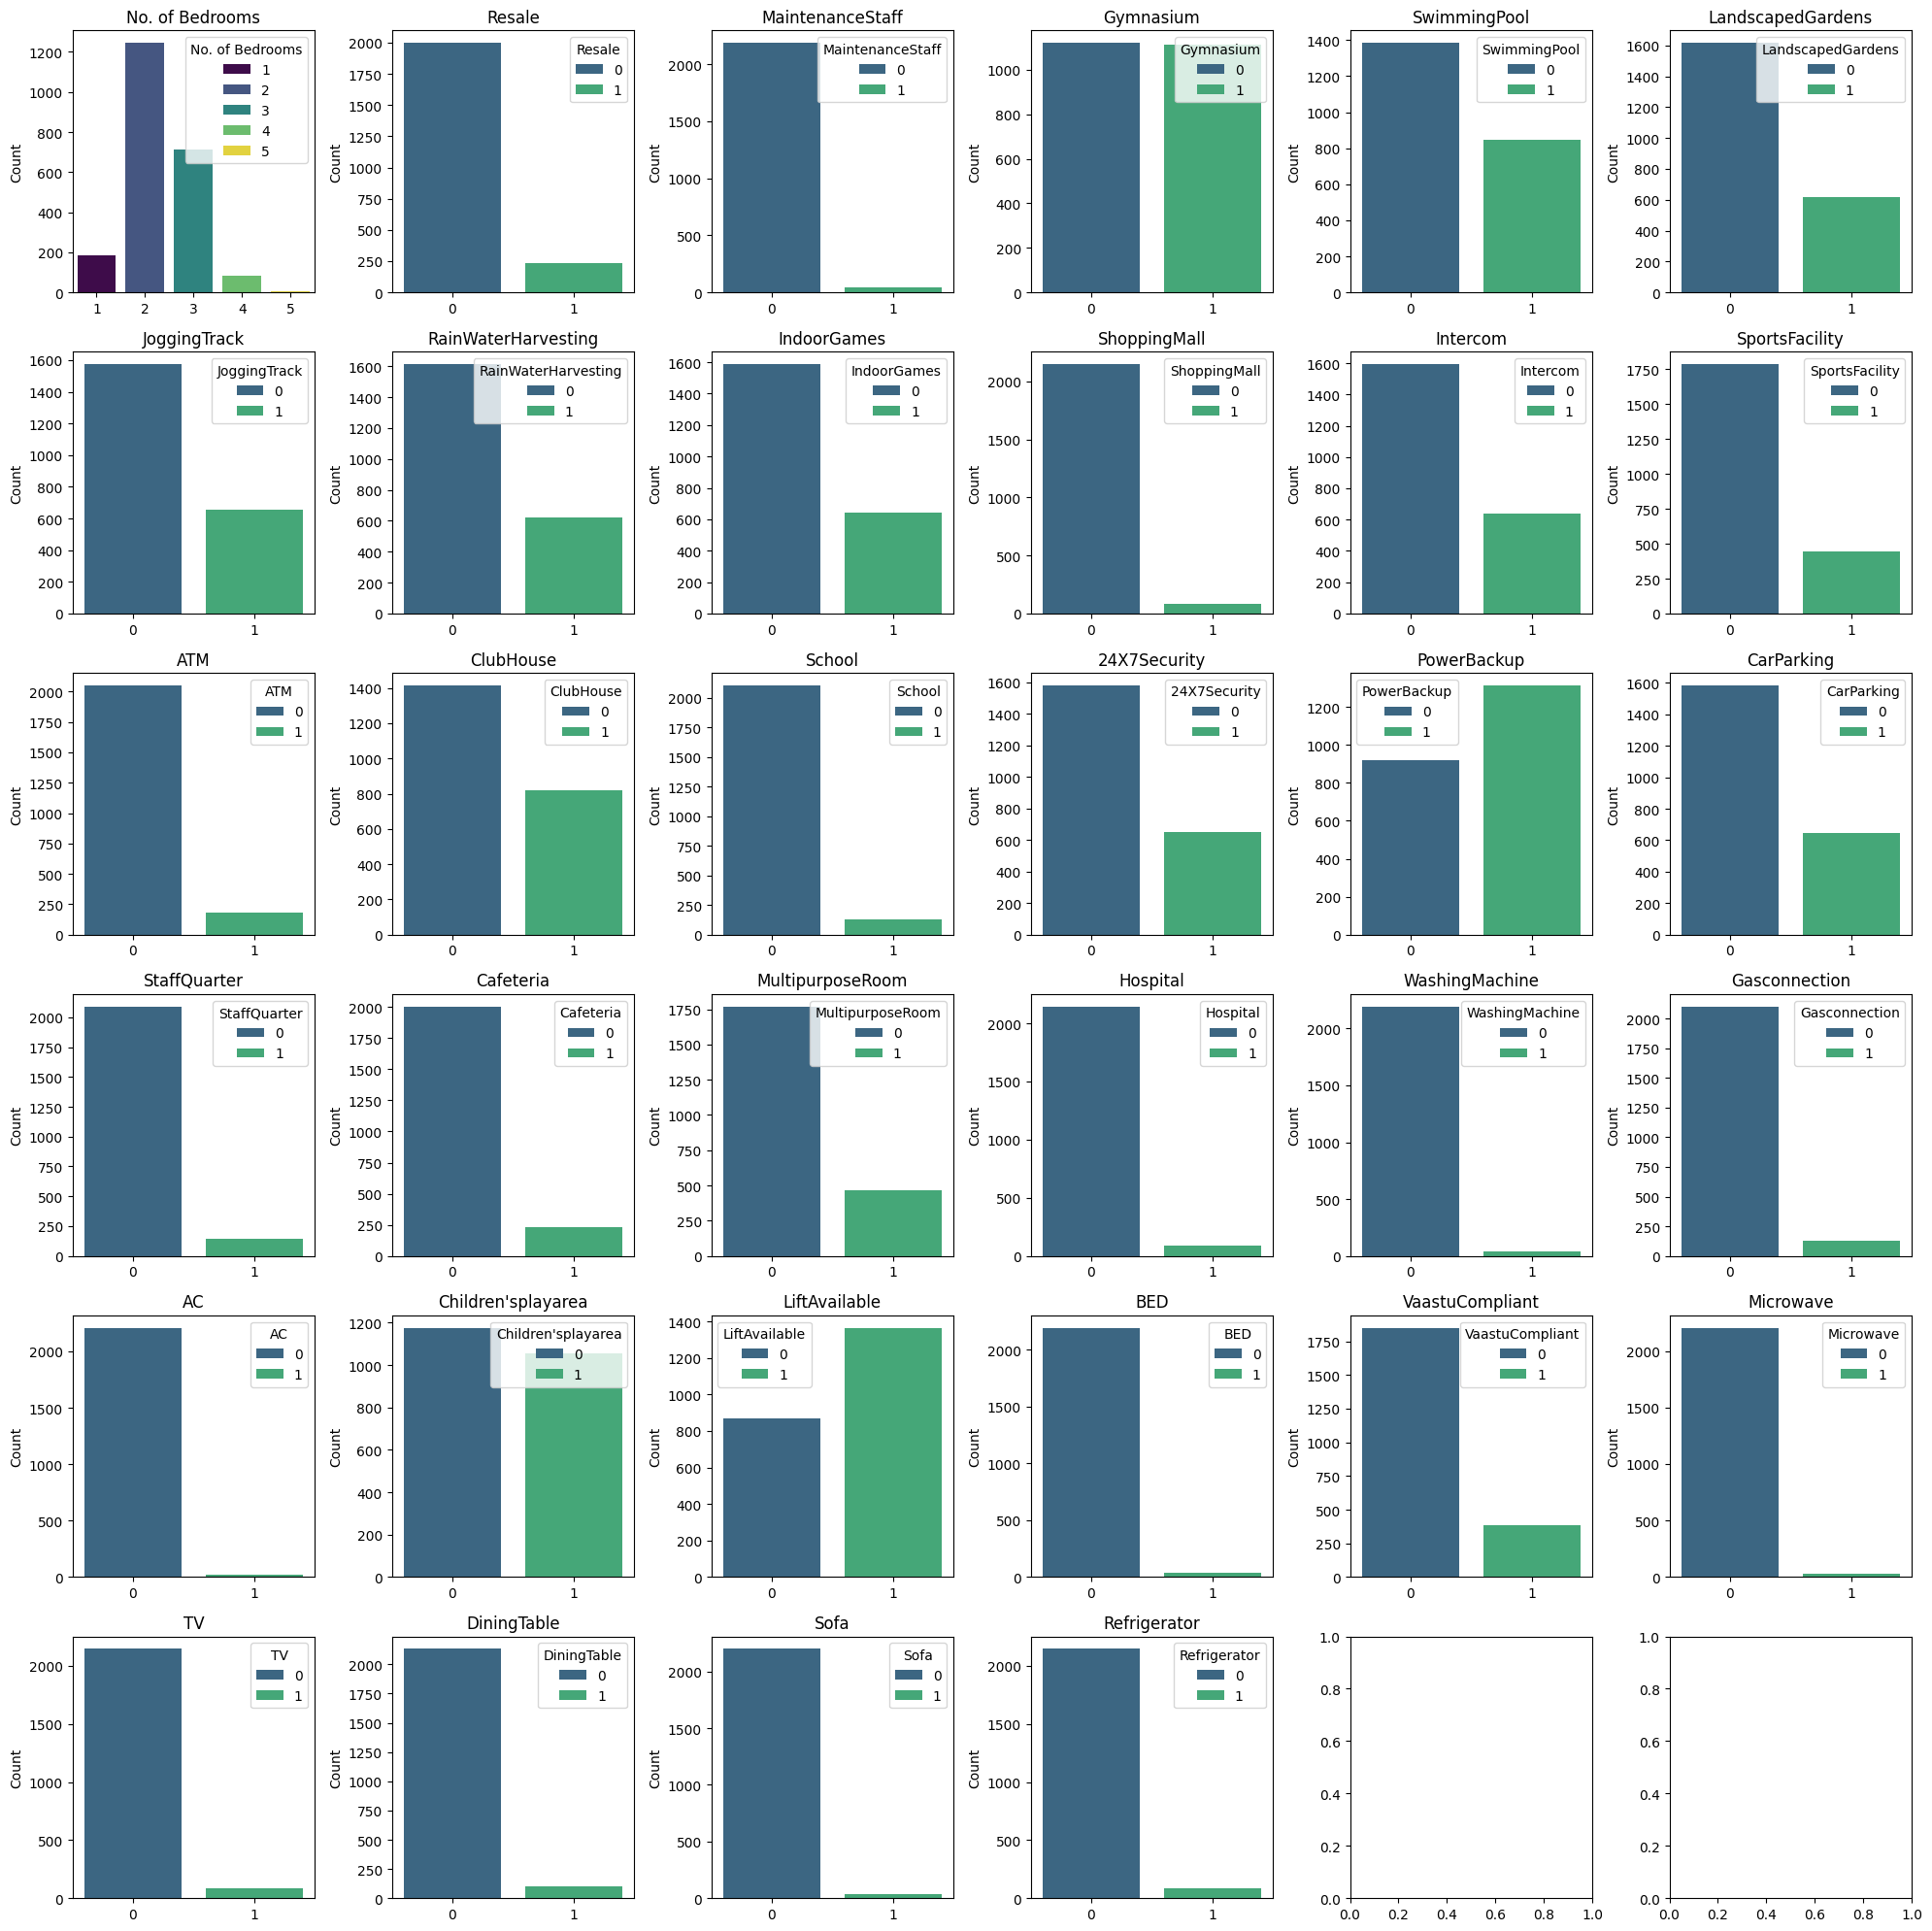

In [20]:
# Selecting only the categorical columns
categorical_columns = ['No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', "Children'splayarea", 'LiftAvailable', 'BED',
       'VaastuCompliant', 'Microwave', 'TV', 'DiningTable', 'Sofa',
       'Refrigerator']

# Plotting count plots for each categorical variable
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i//6, i%6],palette='viridis',hue=column)
    axes[i//6, i%6].set_title(column)
    axes[i//6, i%6].set_xlabel('')
    axes[i//6, i%6].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Insights from Count Graphs:

1. The dataset includes houses with a varying number of rooms, ranging from 1 to 5.
2. Observing the count plots for features such as 'Maintenance Staff', 'Shopping','Dining Table', 'Sofa', 'Refrigerator', 'TV', 'AC', 'BED', 'Microwave', 'Hospital', 'Washing Machine', 'ATM', and 'Schools', we notice significant uneven distribution or skewness in the data.
means all this facility are not provided in most of cases while purchasing of a housing.

4.3 "Plotting a Bar Graph: Mean House Prices by Location"

C:\Users\aksha\AppData\Local\Temp\ipykernel_4588\3928087258.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')


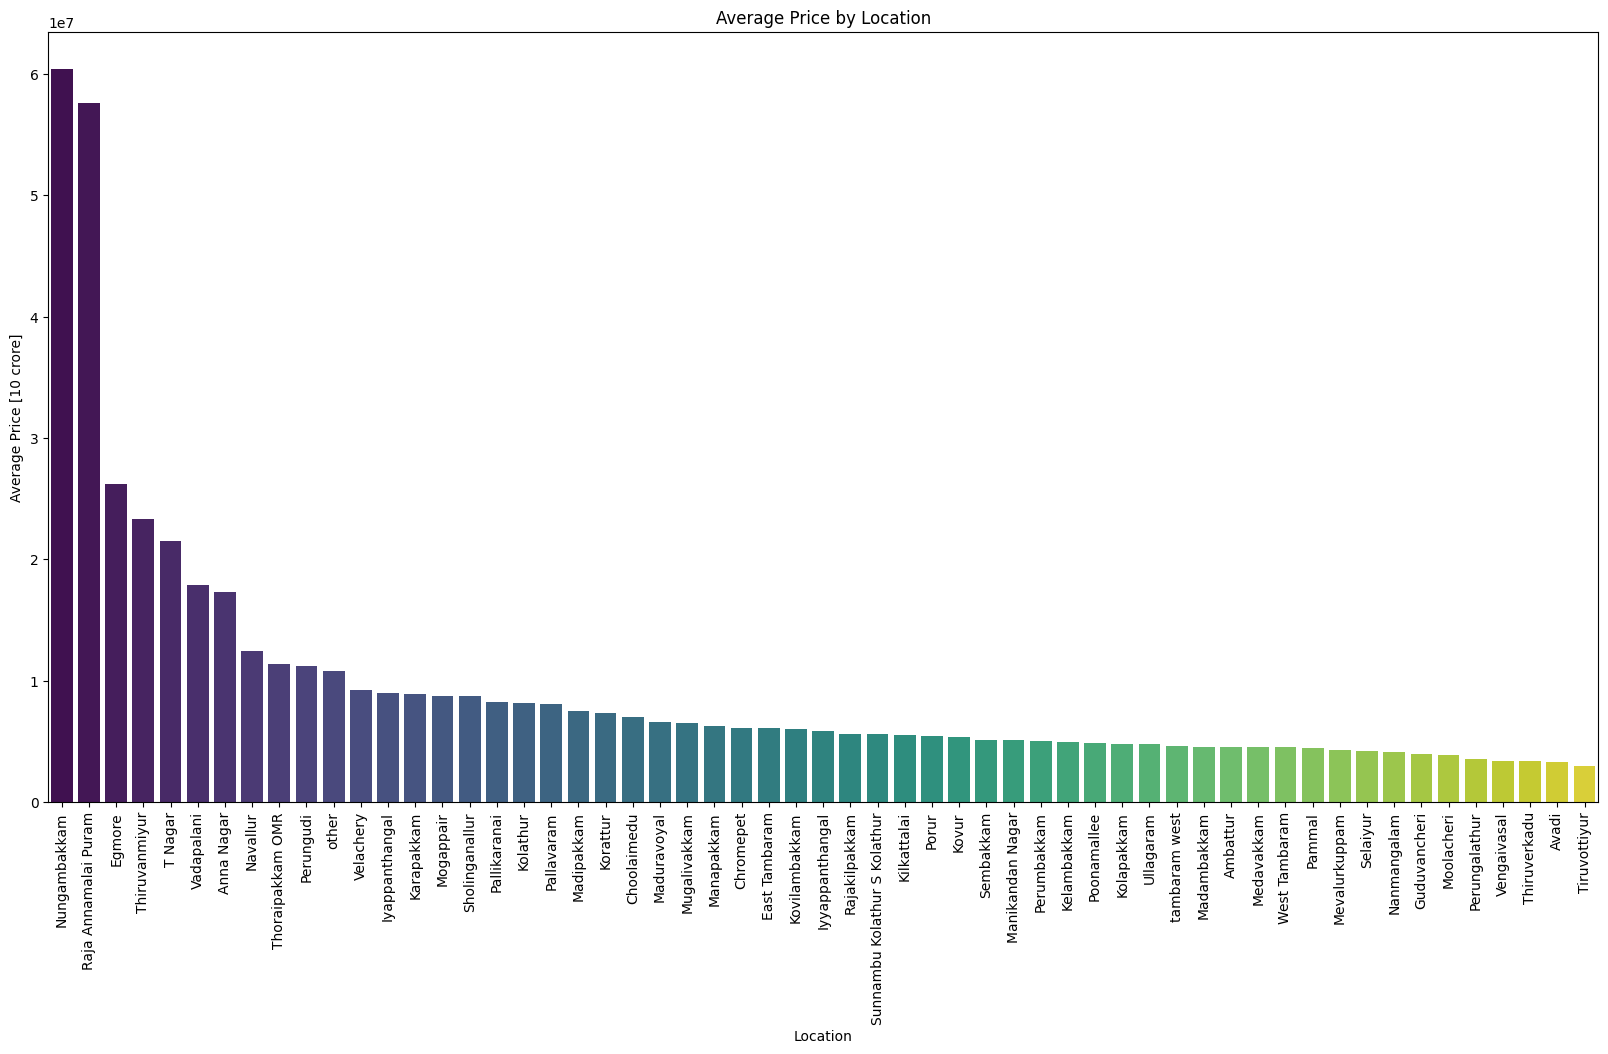

In [21]:
average_prices = data.groupby('Location')['Price'].mean().reset_index()

average_prices = average_prices.sort_values(by='Price', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location')
plt.ylabel('Average Price [10 crore]')
plt.title('Average Price by Location')
plt.show()

#### Insights:
1. The most affluent areas, such as Nungambakkam,Raja Annamalai Puran are likely the luxurious neighborhoods of Chennai, while areas with the least expensive houses include Tiruvotiyur and Avadi.
2. The majority of house prices fall within the range of 10 million to 25 million INR.

4.4 Line plot showing relation between each feature and price

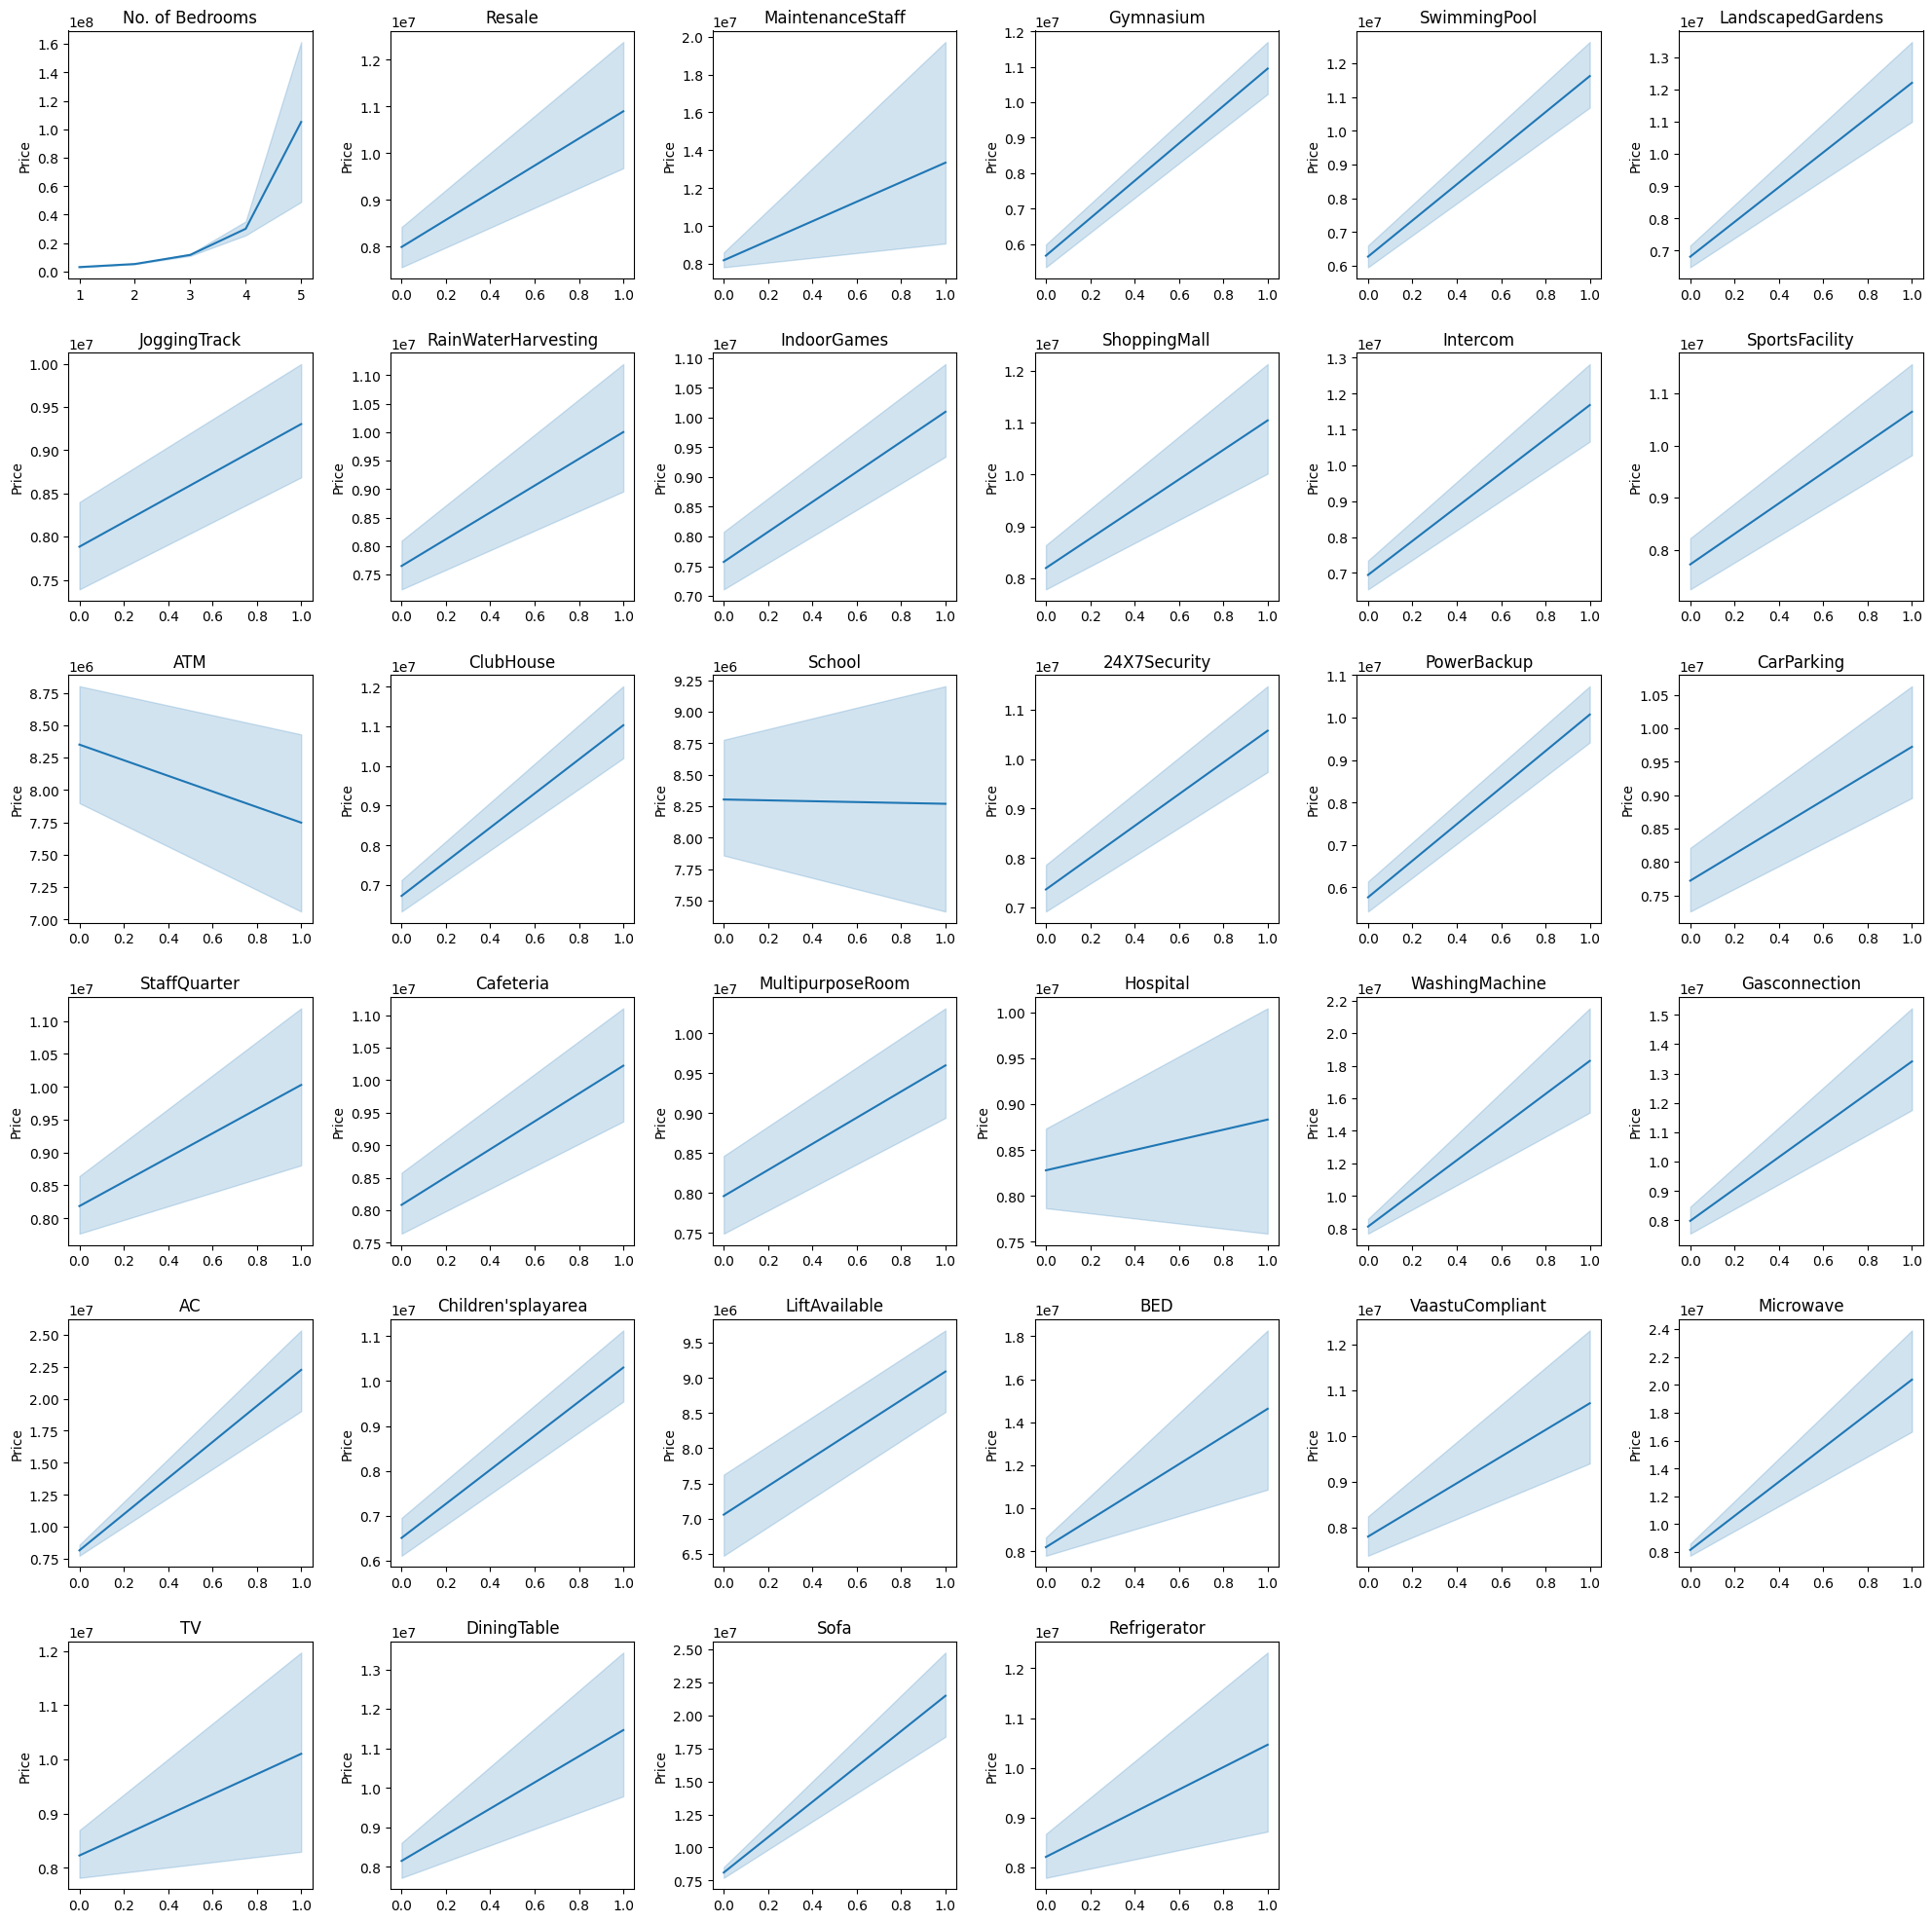

In [22]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    plt.subplot(6, 6, i+1)
    sns.lineplot(x=data[column], y=data['Price'], estimator='mean') 
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#### Insights:
1. The line plots display shadows, with wider shadows behind the line indicating a higher concentration of data points in that range, and vice versa.
2. The presence or absence of features such as Hospital, or School near the house does not have a significant impact on price. Hence, in the next step, we will drop these columns to simplify the model and reduce complexity.
3. An interesting observation is that all features (except ATM) show a positive correlation with price, implying that the presence of any feature tends to increase the price of the house.
4. The proximity of an ATM near a house may decrease property prices due to concerns such as noise, security, aesthetics, privacy, potential for increased crime, and parking congestion.

In [23]:
data = data.drop(columns='School')

#### 5 Standardizing the Data
5.1 Since we only have the 'Area' column as the feature with numerical or continuous values, we will standardize this column only.

In [24]:
std = StandardScaler()

In [25]:
data['Area'] = std.fit_transform(data[['Area']])

#### 6 LabelEncoding

In [26]:
len(data['Location'].value_counts())

57

6.1 Assigning Numerical Values to Locations
- We have 57 unique locations repeated across all 2434 data points. Label encoding will assign a unique numerical value to each location, facilitating numerical processing by machine learning models. This transformation is crucial as models require numerical input rather than strings, ensuring efficient data interpretation and model performance.

In [27]:
encoder = LabelEncoder()

In [28]:
data['Location'] = encoder.fit_transform(data['Location'])

Splitting Data

In [29]:
x = data.drop(columns='Price',axis=1)
y = data['Price']

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

#### 7. Model Selection And Training

7.1 Defining Model Evaluation Function:
- We are utilizing two models, RandomForestRegressor and XGBRegressor, to predict housing prices. A function is defined to take features and corresponding labels, assessing their accuracy using the R2 score metric.

In [31]:
models = [RandomForestRegressor(),XGBRegressor()]

def accuracy(columns,target):
    for model in models:
        print(model)
        model.fit(columns,target)
        pred = model.predict(columns)
        accuracy = r2_score(target,pred)
        print('R2 score is ',accuracy,'\n-----------------------------------------------------------------------------')
        

7.2 Evaluating Models with Train Data:
- Initially, we calculate the R2 score using the training data itself. This step is crucial to ensure that the models do not overfit and can generalize well to unseen data.

In [32]:
print('====================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('====================================\n')
accuracy(xtrain,ytrain)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()


R2 score is  0.976672010616601 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.9989663763529352 
-----------------------------------------------------------------------------


7.3 Evaluating Models with Train and Test Data:
- Initially, we calculate the R2 score using the training data itself. Similarly, we evaluate the models using the test data to confirm their performance on unseen data.

In [33]:
print('=====================================================================================================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('=====================================================================================================================\n')
accuracy(xtest,ytest)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()
R2 score is  0.9633288549909804 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.999816420929088 
--------------------------------------------------

#### Insights- 
In both training and testing data , the accuracy of XGBregressor is high, thus we will take this model for deployment.

7.4 Final model - XGBRegressor

In [34]:
model = XGBRegressor()

In [35]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7.5 Testing Model Prediction on Random Data:
- To assess the model's predictive capability, we randomly select a data point using data.sample() and provide its features to our model. We then evaluate whether the model accurately predicts the corresponding label for this data point.

In [1]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# data.sample()

In [2]:
# input = [-0.303284,28,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# input[0] = std.transform([[input[0]]])[0][0]
# location = input[1]
# try:
#  input[1] = encoder.transform([location])[0]
# except:
#  location = 'other'
#  input[1] = encoder.transform([location])[0]
# input = np.asarray(input).reshape(1,-1)
# pred = model.predict(input)
# pred

#### 8 Ready for Deployment
- After thorough testing, our model demonstrates the ability to make accurate predictions. With satisfactory performance, the model is now deemed ready for deployment .

8.1 Saving the Model.

In [41]:
filename = 'Chennai_model.sav'
pickle.dump(model,open(filename,'wb'))

8.2 Saving the Standard Scaler.

In [42]:
Standard = 'StandardScaler_Chennai.sav'
pickle.dump(std,open(Standard,'wb'))

8.3 Saving the Label Encoder.

In [43]:
encoding = 'encoder_Chennai.sav'
pickle.dump(encoder,open(encoding,'wb'))